In [3]:
using CSV, DataFrames, StatsPlots, StatsBase, Printf, LaTeXStrings, HypothesisTests

df_static = CSV.File("/Users/jjc/CSF/results_feb2023/" * "PV_static.csv")
df_R = CSV.File("/Users/jjc/CSF/results_feb2023/" * "PV_R.csv")
df_RP = CSV.File("/Users/jjc/CSF/results_feb2023/" * "PV_RP.csv")



1141-element CSV.File:
 CSV.Row: (filename = "/Users/jjc/CSF/Recordings/031114DP.hdf5", Rcsf = 1.0, Ib = 29.04, P0 = -10.0, R2 = 0.87)
 CSV.Row: (filename = "/Users/jjc/CSF/Recordings/2003-09-10_MT.hdf5", Rcsf = 14.02, Ib = 1.19, P0 = -3.98, R2 = 0.95)
 CSV.Row: (filename = "/Users/jjc/CSF/Recordings/2003-10-10_PT.hdf5", Rcsf = 1.0, Ib = 21.79, P0 = -10.0, R2 = 0.2)
 CSV.Row: (filename = "/Users/jjc/CSF/Recordings/2003-11-07_NG.hdf5", Rcsf = NaN, Ib = NaN, P0 = NaN, R2 = NaN)
 CSV.Row: (filename = "/Users/jjc/CSF/Recordings/2003-11-10_LH.hdf5", Rcsf = 5.79, Ib = 3.62, P0 = -7.73, R2 = 0.74)
 CSV.Row: (filename = "/Users/jjc/CSF/Recordings/2003-11-21_RP.hdf5", Rcsf = NaN, Ib = NaN, P0 = NaN, R2 = NaN)
 CSV.Row: (filename = "/Users/jjc/CSF/Recordings/2003-11-24_EP.hdf5", Rcsf = 11.19, Ib = 0.97, P0 = -7.14, R2 = 0.81)
 CSV.Row: (filename = "/Users/jjc/CSF/Recordings/2003-11-25_JF.hdf5", Rcsf = 18.07, Ib = 0.81, P0 = -2.21, R2 = 0.92)
 CSV.Row: (filename = "/Users/jjc/CSF/Recordings/2003-

In [8]:
h4 = histogram(df_static.Rcsf, title="Static", label="")
h5 = histogram(df_R.Rcsf, title="Rout only", label="")
h6 = histogram(df_RP.Rcsf, title="Rout + P0", label="")

h1 = scatter(df_static.Rcsf, df_R.Rcsf, xlabel="static", ylabel="Rout only", label="", xlims=[0,50])
h2 = scatter(df_static.Rcsf, df_RP.Rcsf, xlabel="static", ylabel="Rout + P0", label="", xlims=[0,50])
h3 = scatter(df_RP.Rcsf, df_R.Rcsf, xlabel="Rout + P0", ylabel="Rout only", label="", xlims=[0,50])

l = @layout [
    [grid(2, 3)]
]

H = plot(h4, h5, h6, h1, h2, h3, layout=l, size=(700,400), dpi=300, tickfontsize=6)
H[:plot_title] = "Rout"
plot(H)

savefig("PV_Rout.png")

"/Users/jjc/CSF/CSF Dynamics Scripts/PV_Rout.png"

In [18]:
h4 = histogram(df_static.R2, title="Static", label="")
h5 = histogram(df_R.R2, title="Rout only", label="")
h6 = histogram(df_RP.R2, title="Rout + P0", label="")

h1 = scatter(df_static.R2, df_R.R2, xlabel="static", ylabel="Rout only", label="", xlims=[0,1])
h2 = scatter(df_static.R2, df_RP.R2, xlabel="static", ylabel="Rout + P0", label="", xlims=[0,1])
h3 = scatter(df_RP.R2, df_R.R2, xlabel="Rout + P0", ylabel="Rout only", label="", xlims=[0,1])

l = @layout [
    [grid(2, 3)]
]

H = plot(h4, h5, h6, h1, h2, h3, layout=l, size=(700,400), dpi=300, tickfontsize=6)
H[:plot_title] = "R²"
plot(H)

savefig("PV_R2.png")

"/Users/jjc/CSF/CSF Dynamics Scripts/PV_R2.png"

In [35]:
h4 = histogram(df_static.Ib, title="Static", label="", xlims=[0,5])
h5 = histogram(df_R.Ib, bins=1000, title="Rout only", label="", xlims=[0,5])
h6 = histogram(df_RP.Ib, bins=200, title="Rout + P0", label="", xlims=[0,5])

h1 = scatter(df_static.Ib, df_R.Ib, xlabel="static", ylabel="Rout only", label="", xlims=[0,5], ylims=[0,5])
h2 = scatter(df_static.Ib, df_RP.Ib, xlabel="static", ylabel="Rout + P0", label="", xlims=[0,5], ylims=[0,5])
h3 = scatter(df_RP.Ib, df_R.Ib, xlabel="Rout + P0", ylabel="Rout only", label="", xlims=[0,5], ylims=[0,5])

l = @layout [
    [grid(2, 3)]
]

H = plot(h4, h5, h6, h1, h2, h3, layout=l, size=(700,400), dpi=300, tickfontsize=6)
H[:plot_title] = "If"
plot(H)

savefig("PV_Ib.png")

"/Users/jjc/CSF/CSF Dynamics Scripts/PV_Ib.png"

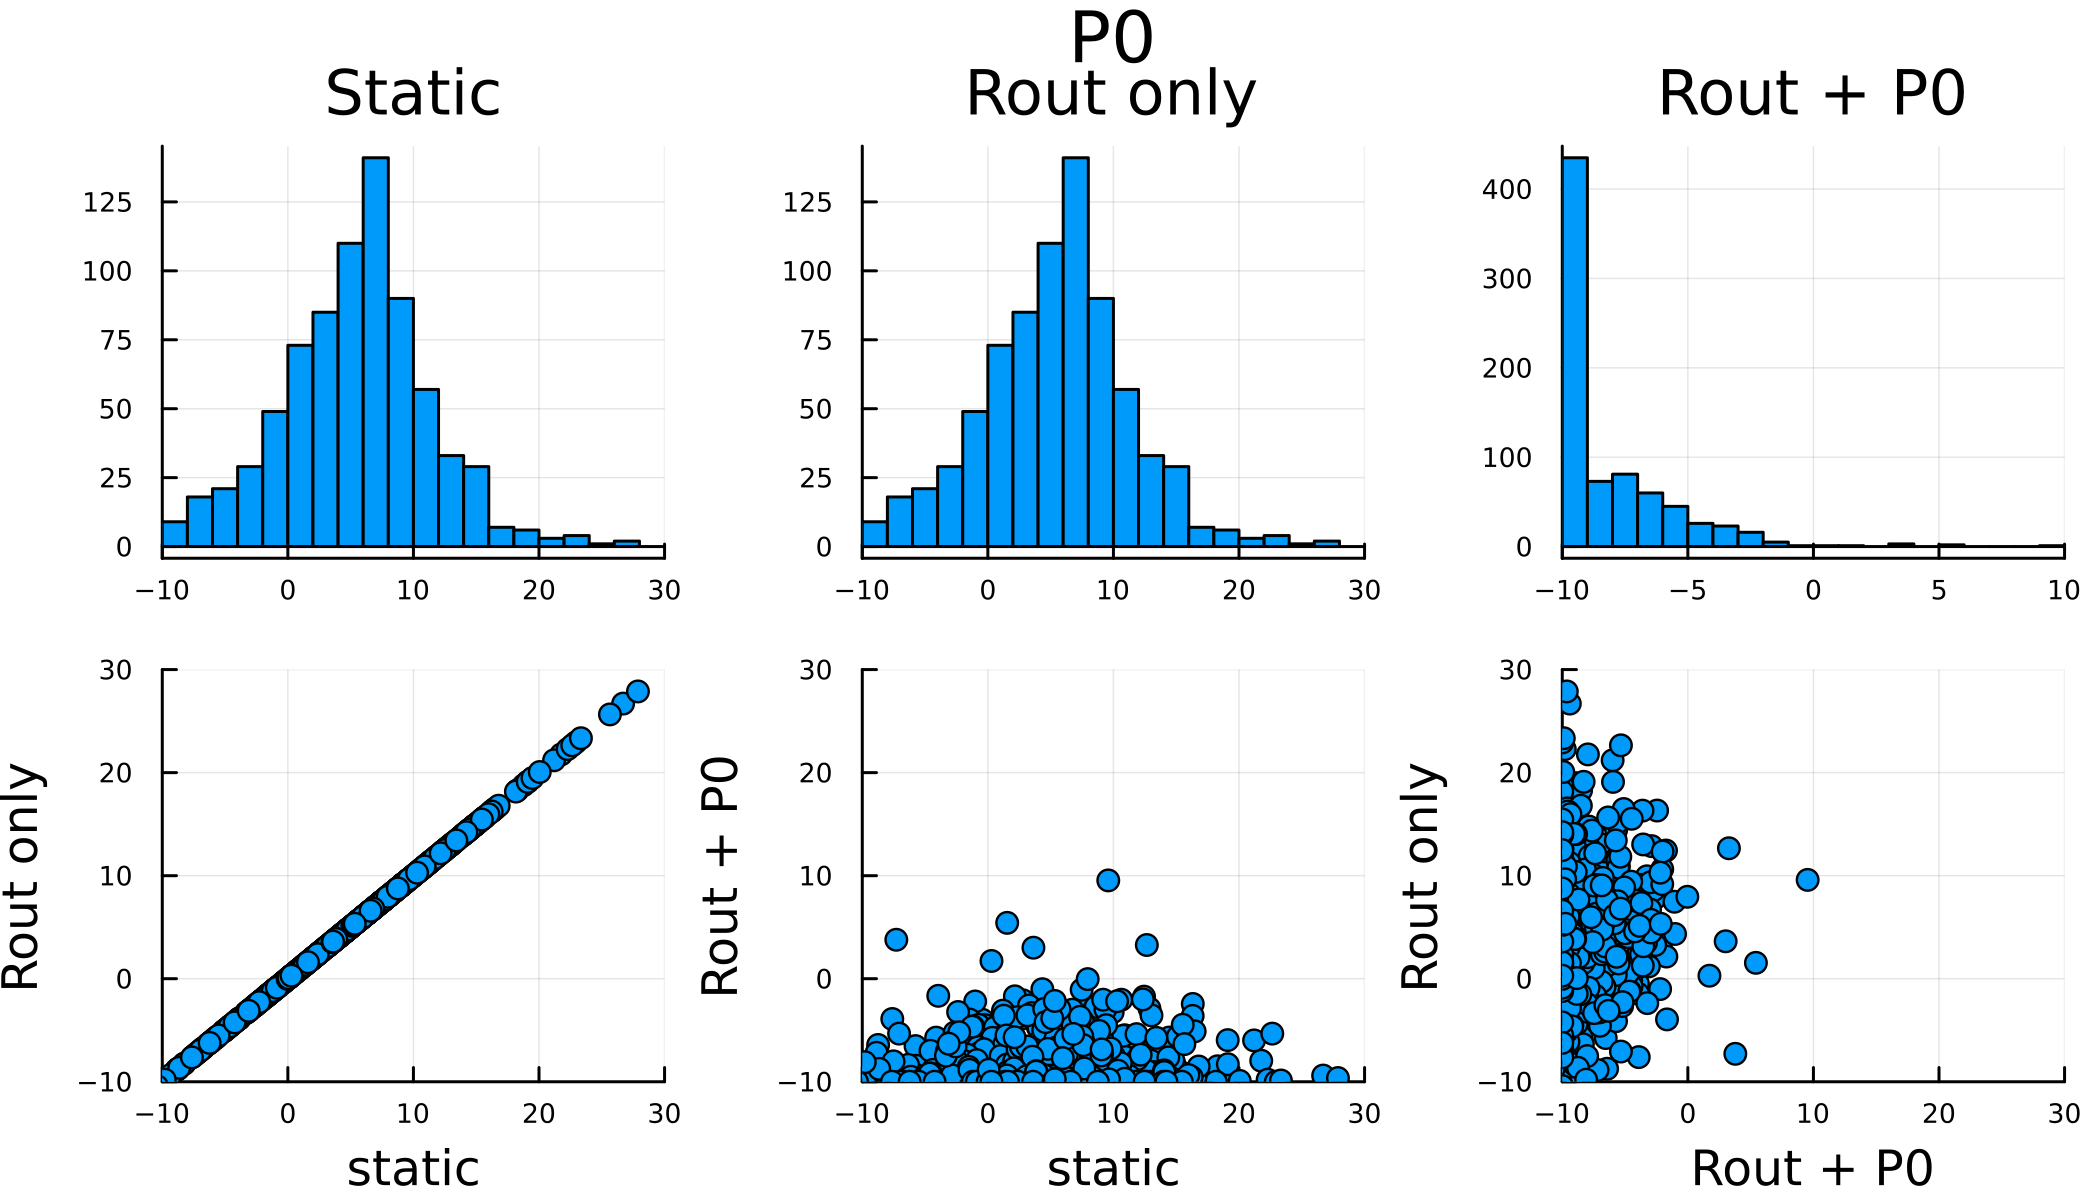

In [52]:
h4 = histogram(df_static.P0, title="Static", label="", xlims=[-10,30])
h5 = histogram(df_R.P0, bins=500, title="Rout only", label="", xlims=[-10,30])
h6 = histogram(df_RP.P0, title="Rout + P0", label="", xlims=[-10,10])

h1 = scatter(df_static.P0, df_R.P0, xlabel="static", ylabel="Rout only", label="", xlims=[-10,30], ylims=[-10,30])
h2 = scatter(df_static.P0, df_RP.P0, xlabel="static", ylabel="Rout + P0", label="", xlims=[-10,30], ylims=[-10,30])
h3 = scatter(df_RP.P0, df_R.P0, xlabel="Rout + P0", ylabel="Rout only", label="", xlims=[-10,30], ylims=[-10,30])

l = @layout [
    [grid(2, 3)]
]

H = plot(h4, h5, h6, h1, h2, h3, layout=l, size=(700,400), dpi=300, tickfontsize=6)
H[:plot_title] = "P0"
plot(H)

# savefig("PV_P0.png")

In [48]:


h4 = histogram(df_static.Ib[.~isnan.(df_static.Ib)], title="Static", xlims=[0,1])
h5 = histogram(df_R.Ib[.~isnan.(df_R.Ib)], title="Rout only", xlims=[0,1])
h6 = histogram(df_RP.Ib[.~isnan.(df_RP.Ib)], title="Rout + P0", xlims=[0,1])

l = @layout [
    [grid(1, 3)]
]

h4 = plot(h4, h5, h6, layout=l, size=(1300,400), dpi=300, tickfontsize=6)

mean(df_RP.Ib[.~isnan.(df_RP.Ib)])

11.709016817593788

In [67]:
h4 = histogram(df_static.R2[.~isnan.(df_static.R2)], title="Static", xlims=[0,1])
h5 = histogram(df_R.R2[.~isnan.(df_R.R2)], title="Rout only", xlims=[0,1])
h6 = histogram(df_RP.R2[.~isnan.(df_RP.R2)], title="Rout + P0", xlims=[0,1])

l = @layout [
    [grid(1, 3)]
]

h4 = plot(h4, h5, h6, layout=l, size=(1300,400), dpi=300, tickfontsize=6)

mRP = mean(df_RP.R2[.~isnan.(df_RP.R2)])
mR = mean(df_R.R2[.~isnan.(df_RP.R2)])
mStatic = mean(df_static.R2[.~isnan.(df_RP.R2)])

print(@sprintf("mean R² (static) = %0.2f \n", mStatic))
print(@sprintf("mean R² (Rout + P0) = %0.2f \n", mRP))
print(@sprintf("mean R² (Rout only) = %0.2f \n", mR))




mean R² (static) = 0.68 
mean R² (Rout + P0) = 0.73 
mean R² (Rout only) = 0.75 


In [66]:
h4 = histogram(df_static.Ib[.~isnan.(df_static.Ib)], title="Static", xlims=[0,1])
h5 = histogram(df_R.Ib[.~isnan.(df_R.Ib)], title="Rout only", xlims=[0,1])
h6 = histogram(df_RP.Ib[.~isnan.(df_RP.Ib)], title="Rout + P0", xlims=[0,1])

l = @layout [
    [grid(1, 3)]
]

h4 = plot(h4, h5, h6, layout=l, size=(1300,400), dpi=300, tickfontsize=6)

mRP = mean(df_RP.Ib[.~isnan.(df_RP.Ib)])
mR = mean(df_R.Ib[.~isnan.(df_RP.Ib)])
mStatic = mean(df_static.Ib[.~isnan.(df_RP.Ib)])

print(@sprintf("mean If (static) = %0.2f \n", mStatic))
print(@sprintf("mean If (Rout + P0) = %0.2f \n", mRP))
print(@sprintf("mean If (Rout only) = %0.2f \n", mR))




mean If (static) = 0.40 
mean If (Rout + P0) = 11.71 
mean If (Rout only) = 1.66 


In [64]:
h4 = histogram(df_static.P0[.~isnan.(df_static.P0)], title="Static", xlims=[0,1])
h5 = histogram(df_R.P0[.~isnan.(df_R.P0)], title="Rout only", xlims=[0,1])
h6 = histogram(df_RP.P0[.~isnan.(df_RP.P0)], title="Rout + P0", xlims=[0,1])

l = @layout [
    [grid(1, 3)]
]

h4 = plot(h4, h5, h6, layout=l, size=(1300,400), dpi=300, tickfontsize=6)

mRP = mean(df_RP.P0[.~isnan.(df_RP.P0)])
mR = mean(df_R.P0[.~isnan.(df_RP.P0)])
mStatic = mean(df_static.P0[.~isnan.(df_RP.P0)])

print(@sprintf("mean P₀ (static) = %0.2f \n", mStatic))
print(@sprintf("mean P₀ (Rout + P0) = %0.2f \n", mRP))
print(@sprintf("mean P₀ (Rout only) = %0.2f \n", mR))




mean P₀ (static) = 5.98 
mean P₀ (Rout + P0) = -8.26 
mean P₀ (Rout only) = 5.98 


In [65]:
h4 = histogram(df_static.Rcsf[.~isnan.(df_static.Rcsf)], title="Static", xlims=[0,1])
h5 = histogram(df_R.Rcsf[.~isnan.(df_R.Rcsf)], title="Rout only", xlims=[0,1])
h6 = histogram(df_RP.Rcsf[.~isnan.(df_RP.Rcsf)], title="Rout + Rcsf", xlims=[0,1])

l = @layout [
    [grid(1, 3)]
]

h4 = plot(h4, h5, h6, layout=l, size=(1300,400), dpi=300, tickfontsize=6)

mRP = mean(df_RP.Rcsf[.~isnan.(df_RP.Rcsf)])
mR = mean(df_R.Rcsf[.~isnan.(df_RP.Rcsf)])
mStatic = mean(df_static.Rcsf[.~isnan.(df_RP.Rcsf)])

print(@sprintf("mean Rout (static) = %0.2f \n", mStatic))
print(@sprintf("mean Rout (Rout + Rcsf) = %0.2f \n", mRP))
print(@sprintf("mean Rout (Rout only) = %0.2f \n", mR))




mean Rout (static) = 12.00 
mean Rout (Rout + Rcsf) = 5.11 
mean Rout (Rout only) = 15.97 
